# Vision Transformer implementation

## Background

The program includes three parts:

* tools.py: defined the transfer learning, dataset management, and drawing functions
* models.py: defined the ViT model.
* train.py: defined the training function

These three files include detailed comments illustrating the Vision Transformer's data flow and its training process. Furthermore, here we will focus on the implementation and the result visualization.

The test environment includes:
* One Nvidia A6000

To initialize a new environment, we can create a new python environment using Conda and install the required packages by `pip install -r requirements.txt`.

## Training and visualization

To simply test the performance of ViT, we can run `train.py`:

In [1]:
!python train.py

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 16:57:13.934396: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 0.3041, train acc 0.874, val acc 0.958, lr 0.000010, time 4.9 sec
epoch 2, loss 0.0066, train acc 1.000, val acc 0.979, lr 0.000010, time 8.9 sec
epoch 3, loss 0.0008, train acc 1.000, val acc 0.938, lr 0.000009, time 12.9 sec
epoch 4, loss 0.0006, train acc 1.000, val acc 0.979, lr 0.000008, time 16.8 sec
epoch 5, loss 0.0004, train acc 1.000, val acc 0.958, lr 0.000008, time 20.8 sec
epoch 6, loss 0.0008, train acc 1.000, val acc 0.958, lr 0.000007, time 24.8 sec
epoch 7, loss 0.0003, train acc 1.000, val acc 0.938, lr 0.000006, time 28.7 sec
epoch 8, loss 0.0004, train acc 1.000, val acc 1.0

The program also provides visualization results.

The **data distribution** and the **training result** can be found under the folder `result`.

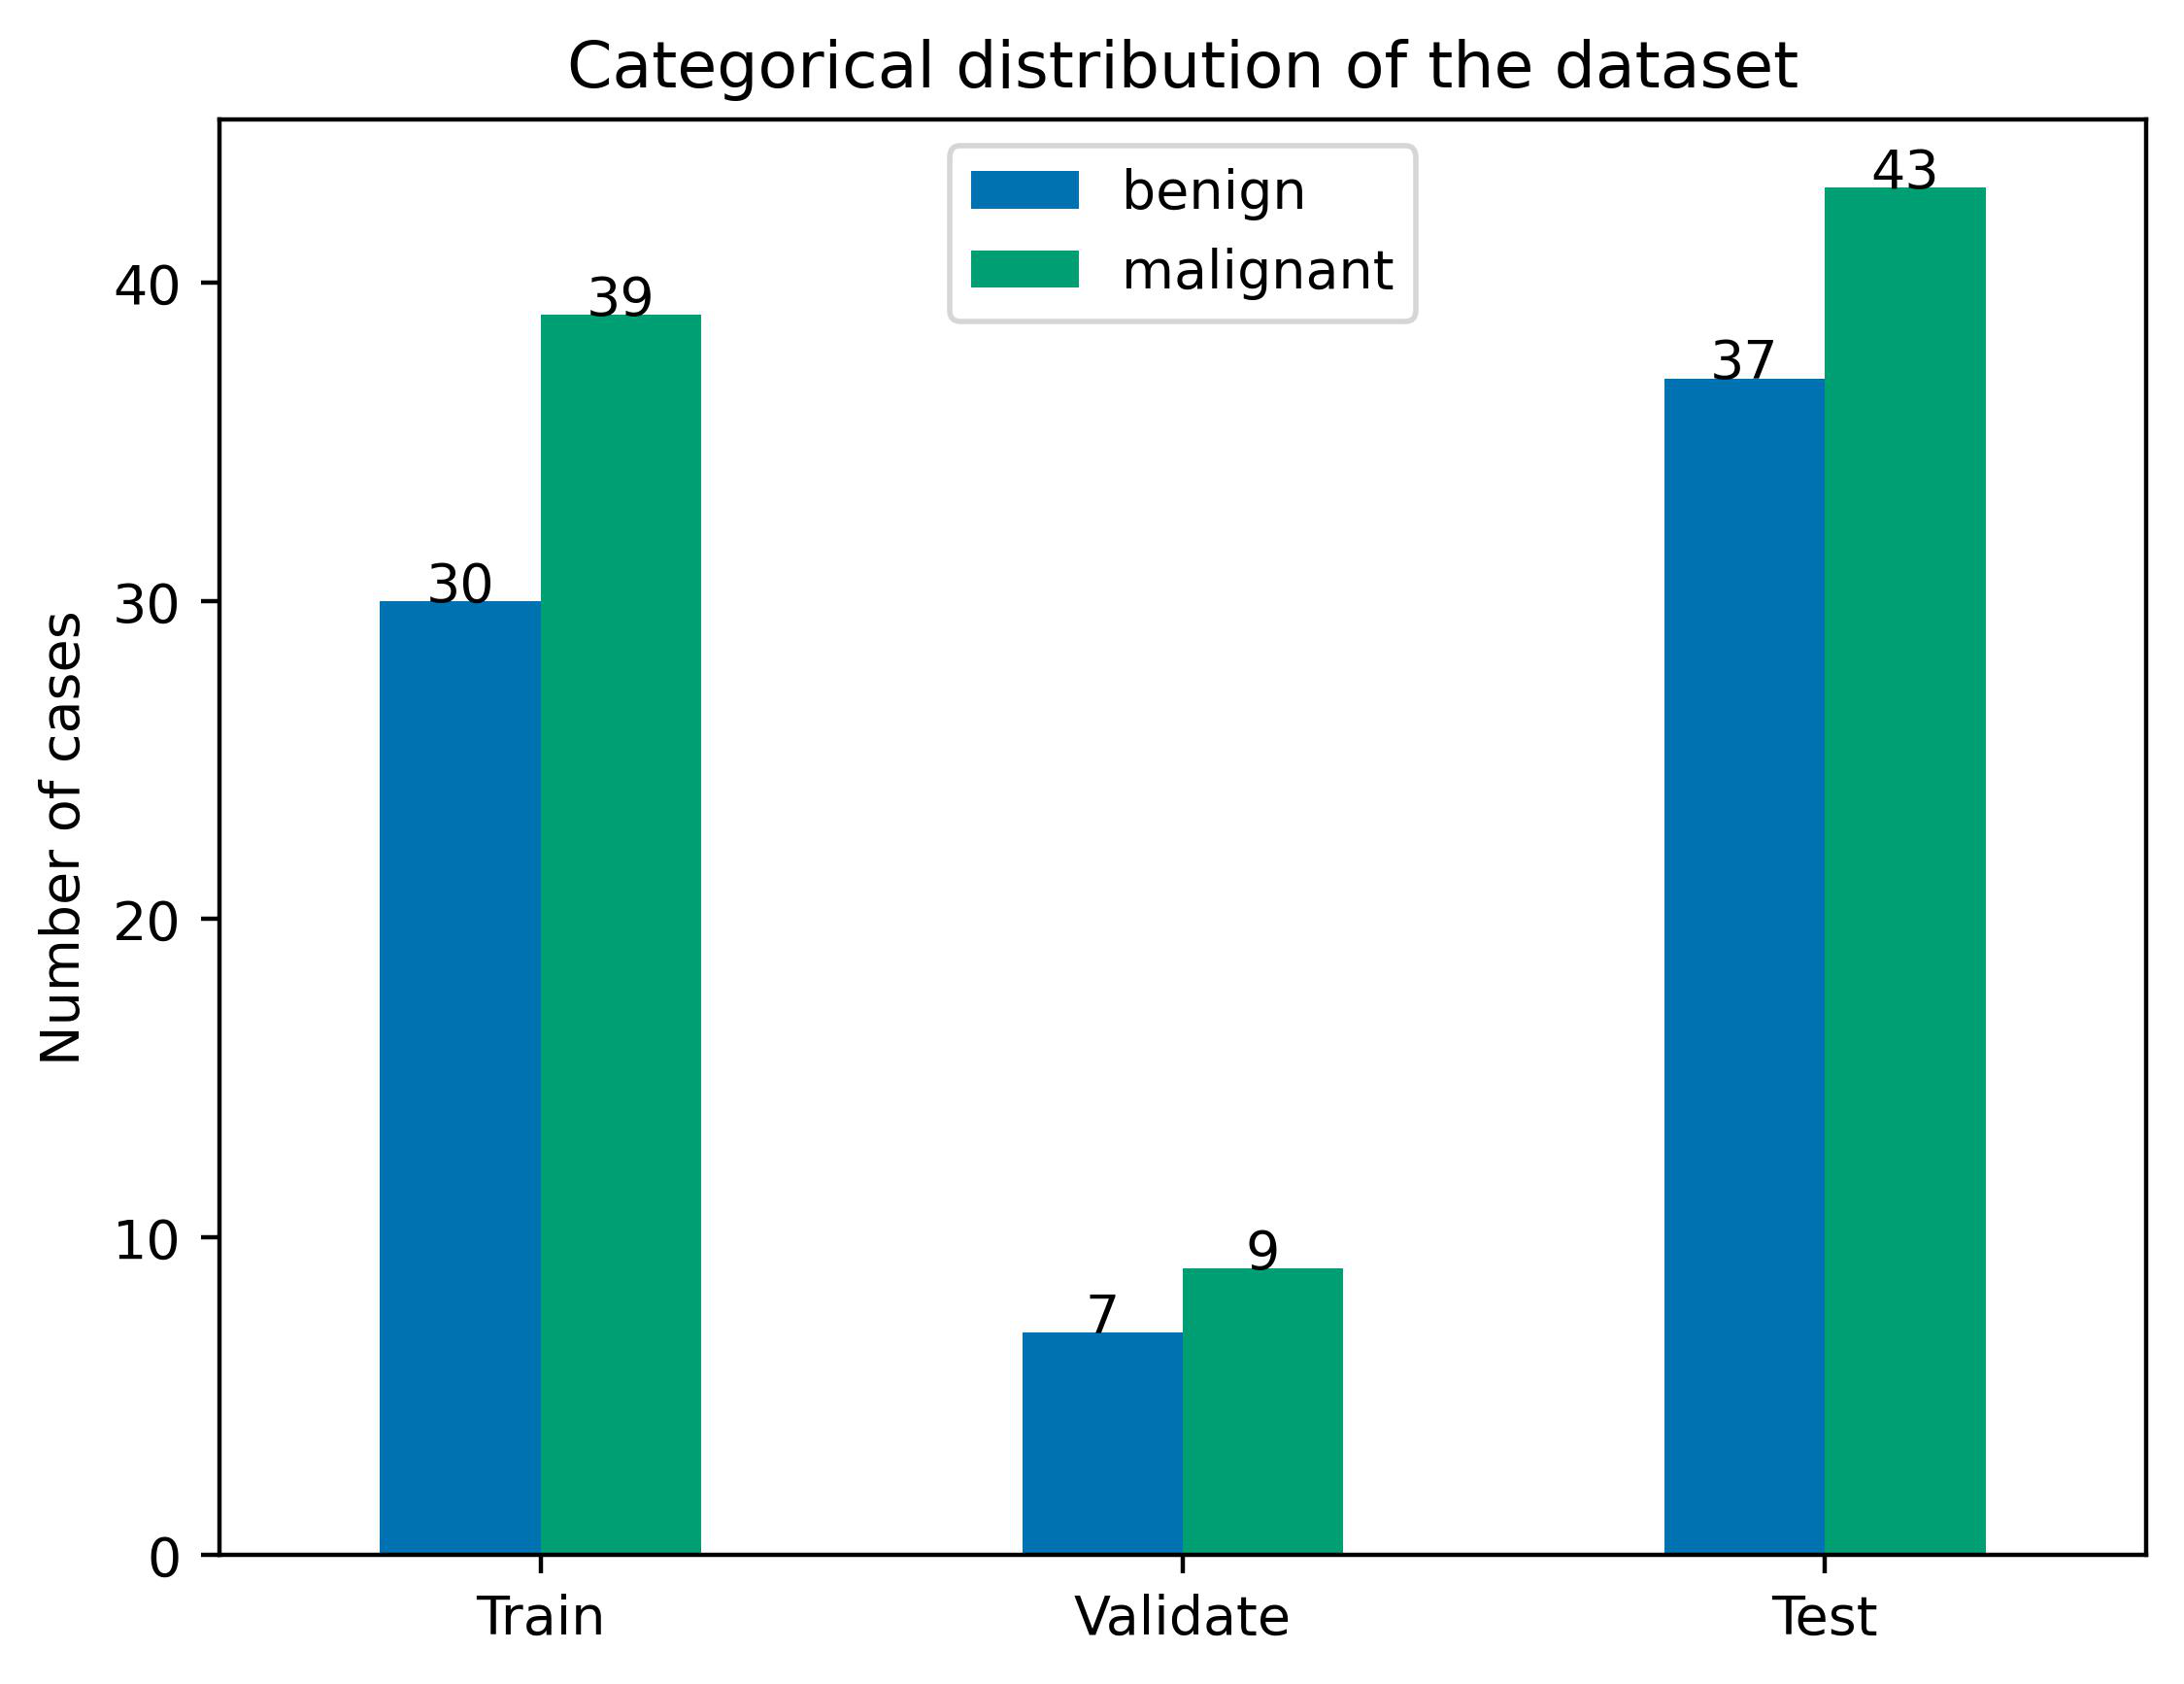

In [2]:
import os
from PIL import Image

# Fetch the original dataset distribution
img = Image.open(os.path.join('result', 'vit_3_8_10_2023-01-15_16-57-02', 'dataset_analysis.jpg'))
img

The distribution of the dataset shows that there are few training and validation images, which means we need to extract information from the original dataset as much as possible. Also, it might be suitable to use data augmentation methods to increase the number of training data.

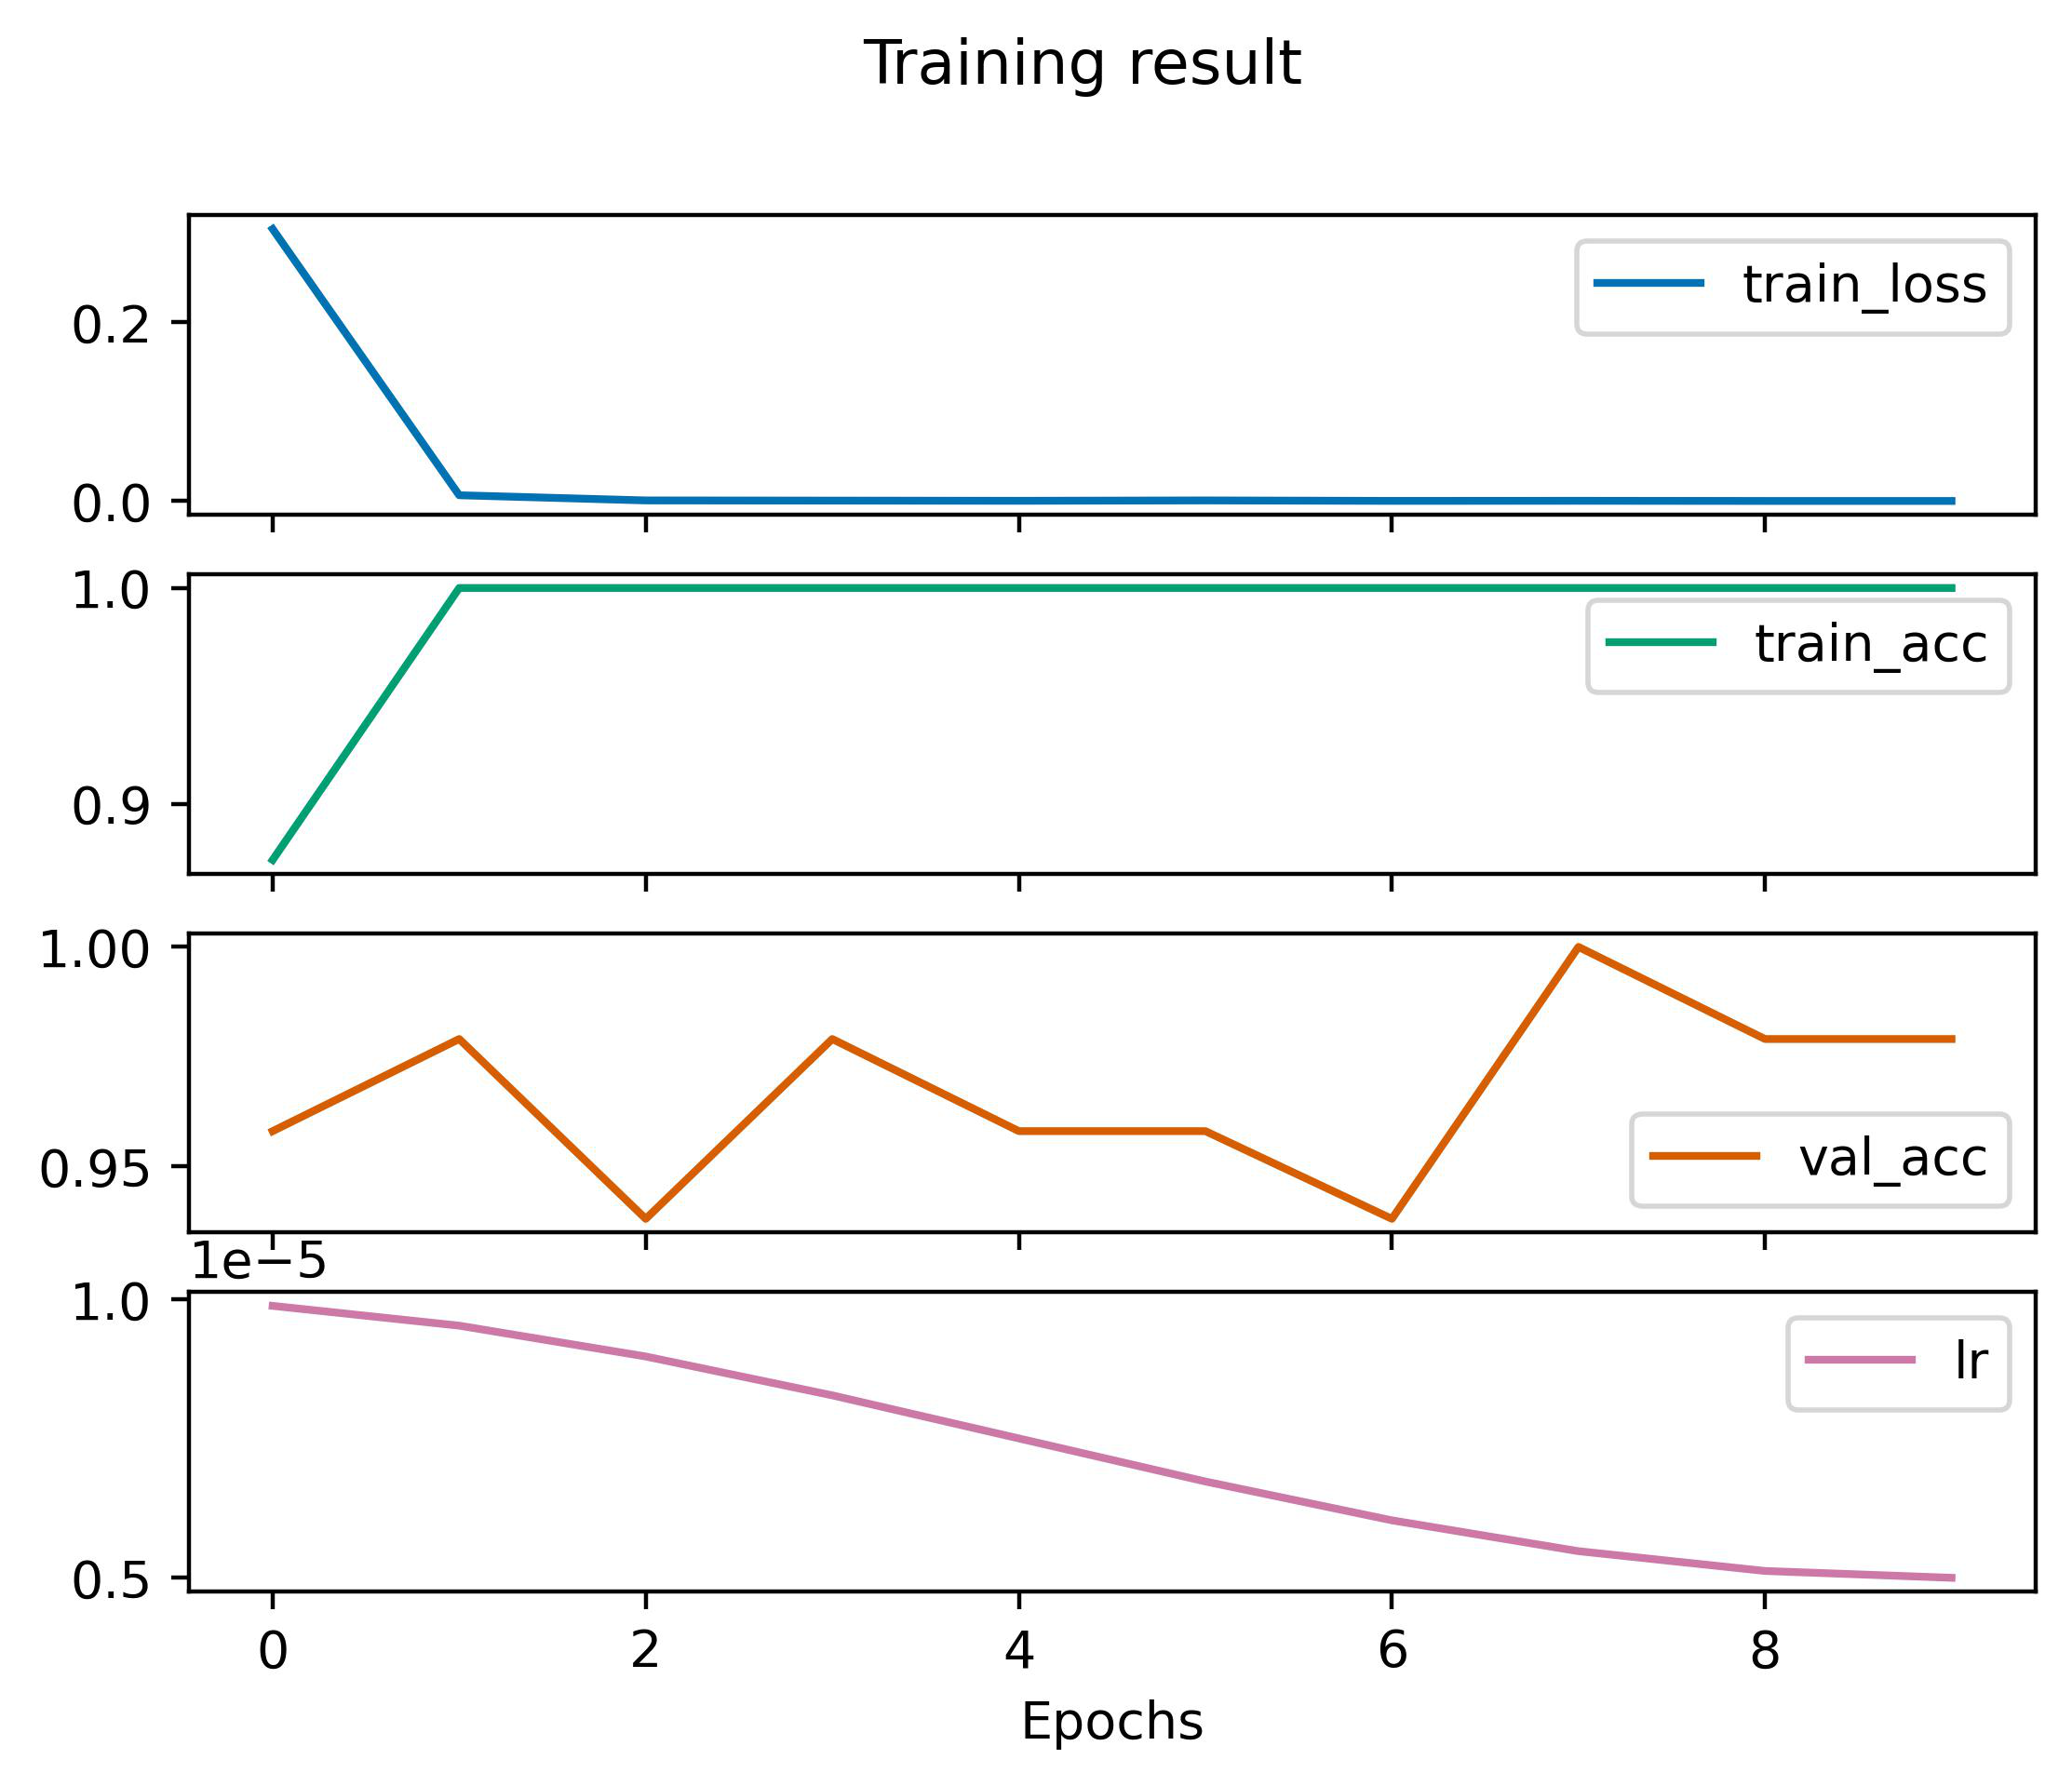

In [4]:
# Fetch the training result
img = Image.open(os.path.join('result', 'vit_3_8_10_2023-01-15_16-57-02', 'training_result.jpg'))
img

Even if the **test accuracy reaches 1**, the validation accuracy has not been well improved like the training accuracy during the first 10 epochs. This is perhaps because the training accuracy reaches 1 too fast (within 2 epochs), and the learning rate is relatively low. When applying the cosine decay scheduler, the learning rate drops further, and the loss quickly turns to near 0, which halts the training process.

Those figures only show the performance of a particular training process. However, all the training results are stored on **tensorboard**. The tensorboard can be visited on `http://server_ip:7777/` after running the following command.

In [6]:
!tensorboard --logdir=result --host=0.0.0.0 --port=7777

2023-01-15 17:02:22.161838: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
TensorBoard 2.4.0 at http://0.0.0.0:7777/ (Press CTRL+C to quit)
^C


## Exploring various hyper-parameters

By default, the program will use **data augmentation** method and **scheduler** during the training process. The default settings include the following:

* batch_size    : 8
* custom_transform  : rotation
* augment       : 3
* lr            : 0.00001
* num_epochs    : 10
* min_r         : 0.5
* dataset_dir   : warwick_CLS

By running `python train.py --help`, we can acquire the meanings and the default settings of those parameters inside my code.

In [7]:
!python train.py --help

usage: train.py [-h] [--batch_size BATCH_SIZE]
                [--custom_transform CUSTOM_TRANSFORM] [--augment AUGMENT]
                [--lr LR] [--num_epochs NUM_EPOCHS] [--min_r MIN_R]
                [--dataset_dir DATASET_DIR]

Vision transformer training example

optional arguments:
  -h, --help            show this help message and exit
  --batch_size BATCH_SIZE
                        Batch size.
  --custom_transform CUSTOM_TRANSFORM
                        Where you stored the dataset.
  --augment AUGMENT     Dataset augmentation times (by rotating the input
                        image)
  --lr LR               Learning rate.
  --num_epochs NUM_EPOCHS
                        Number of epochs for training.
  --min_r MIN_R         Minimum learning rate ratio. Used by the scheduler.
  --dataset_dir DATASET_DIR
                        Where you stored the dataset.


Then we can adjust the hyper-parameters and test the performance. For example, here, we set `lr` to 0.0001 for a higher learning rate.

In [9]:
!python train.py --lr 0.0001

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 17:08:43.463286: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 1.5910, train acc 0.527, val acc 0.562, lr 0.000099, time 4.8 sec
epoch 2, loss 0.8934, train acc 0.531, val acc 0.562, lr 0.000095, time 8.8 sec
epoch 3, loss 0.5991, train acc 0.609, val acc 0.625, lr 0.000090, time 12.7 sec
epoch 4, loss 0.4166, train acc 0.792, val acc 0.917, lr 0.000083, time 16.6 sec
epoch 5, loss 0.0551, train acc 0.990, val acc 0.833, lr 0.000075, time 20.5 sec
epoch 6, loss 0.2345, train acc 0.913, val acc 0.750, lr 0.000067, time 24.3 sec
epoch 7, loss 0.0538, train acc 0.976, val acc 0.938, lr 0.000060, time 28.2 sec
epoch 8, loss 0.0080, train acc 0.995, val acc 0.8

Also, the default training process uses random rotation for data augmentation. However, when using rotation, the used scale of the original image will be decreased to $1/\sqrt{2}$ to avoid involving a null value and therefore lose some information. Here we will disable the data augmentation, including the rotation step and the scheduler, and see how the model performs.

In [10]:
!python train.py --custom_transform center --augment 1 --min_r 1

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 17:11:09.152297: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 0.6896, train acc 0.725, val acc 1.000, lr 0.000010, time 2.1 sec
epoch 2, loss 0.0948, train acc 0.942, val acc 1.000, lr 0.000010, time 3.3 sec
epoch 3, loss 0.0165, train acc 1.000, val acc 1.000, lr 0.000010, time 4.5 sec
epoch 4, loss 0.0007, train acc 1.000, val acc 1.000, lr 0.000010, time 5.7 sec
epoch 5, loss 0.0002, train acc 1.000, val acc 0.875, lr 0.000010, time 6.9 sec
epoch 6, loss 0.0003, train acc 1.000, val acc 0.875, lr 0.000010, time 8.1 sec
epoch 7, loss 0.0002, train acc 1.000, val acc 0.875, lr 0.000010, time 9.3 sec
epoch 8, loss 0.0002, train acc 1.000, val acc 0.875, l

Now, we utilize the random rotation method for the original dataset, and the accuracy increased:

In [11]:
!python train.py --augment 1 --min_r 1

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 17:11:42.811321: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 0.5222, train acc 0.783, val acc 0.938, lr 0.000010, time 2.3 sec
epoch 2, loss 0.0818, train acc 0.971, val acc 0.938, lr 0.000010, time 3.6 sec
epoch 3, loss 0.0300, train acc 1.000, val acc 0.875, lr 0.000010, time 5.0 sec
epoch 4, loss 0.0239, train acc 0.986, val acc 1.000, lr 0.000010, time 6.3 sec
epoch 5, loss 0.0009, train acc 1.000, val acc 1.000, lr 0.000010, time 7.6 sec
epoch 6, loss 0.0012, train acc 1.000, val acc 1.000, lr 0.000010, time 9.0 sec
epoch 7, loss 0.0006, train acc 1.000, val acc 1.000, lr 0.000010, time 10.3 sec
epoch 8, loss 0.0005, train acc 1.000, val acc 1.000, 

After adding the cosine decay scheduler, the performance of the model has slightly improved:

In [12]:
!python train.py --augment 1 --min_r 0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 17:33:49.157259: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 0.5222, train acc 0.783, val acc 0.938, lr 0.000010, time 2.3 sec
epoch 2, loss 0.0820, train acc 0.971, val acc 0.938, lr 0.000009, time 3.6 sec
epoch 3, loss 0.0310, train acc 1.000, val acc 0.938, lr 0.000008, time 5.0 sec
epoch 4, loss 0.0197, train acc 0.986, val acc 0.938, lr 0.000007, time 6.3 sec
epoch 5, loss 0.0008, train acc 1.000, val acc 1.000, lr 0.000005, time 7.7 sec
epoch 6, loss 0.0006, train acc 1.000, val acc 1.000, lr 0.000003, time 9.0 sec
epoch 7, loss 0.0005, train acc 1.000, val acc 1.000, lr 0.000002, time 10.4 sec
epoch 8, loss 0.0016, train acc 1.000, val acc 1.000, 

We can utilize more data by augmentation or increasing the training epochs. As the classification accuracy already reaches 100% in the previous experiment, those additional methods are unnecessary for this particular task. However, those methods might be helpful when facing other image classification tasks.

In [13]:
!python train.py --augment 9

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 17:34:23.511696: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 0.0526, train acc 0.981, val acc 0.993, lr 0.000010, time 12.8 sec
epoch 2, loss 0.0020, train acc 1.000, val acc 0.993, lr 0.000010, time 24.5 sec
epoch 3, loss 0.0000, train acc 1.000, val acc 0.986, lr 0.000009, time 36.4 sec
epoch 4, loss 0.0000, train acc 1.000, val acc 0.979, lr 0.000008, time 48.2 sec
epoch 5, loss 0.0000, train acc 1.000, val acc 1.000, lr 0.000008, time 60.0 sec
epoch 6, loss 0.0000, train acc 1.000, val acc 0.993, lr 0.000007, time 71.8 sec
epoch 7, loss 0.0000, train acc 1.000, val acc 0.979, lr 0.000006, time 83.5 sec
epoch 8, loss 0.0000, train acc 1.000, val acc 0

In [17]:
!python train.py --num_epochs 30

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Ignored weights : head.weight
Ignored weights : head.bias
2023-01-15 14:32:20.801891: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training on cuda
epoch 1, loss 0.3041, train acc 0.874, val acc 0.958, lr 0.000010, time 5.0 sec
epoch 2, loss 0.0066, train acc 1.000, val acc 0.979, lr 0.000010, time 8.9 sec
epoch 3, loss 0.0008, train acc 1.000, val acc 0.938, lr 0.000010, time 12.9 sec
epoch 4, loss 0.0006, train acc 1.000, val acc 0.979, lr 0.000010, time 16.9 sec
epoch 5, loss 0.0004, train acc 1.000, val acc 0.958, lr 0.000010, time 20.9 sec
epoch 6, loss 0.0008, train acc 1.000, val acc 0.958, lr 0.000010, time 24.8 sec
epoch 7, loss 0.0003, train acc 1.000, val acc 0.938, lr 0.000009, time 28.7 sec
epoch 8, loss 0.0003, train acc 1.000, val acc 1.0